In [21]:
import pandas as pd

In [22]:
import matplotlib.pyplot as plt

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import seaborn as sns

In [24]:
facebook=pd.read_csv('facebook_ads_data.csv')

In [25]:
facebook['ad_date']=pd.to_datetime(facebook ['ad_date'], format='mixed')

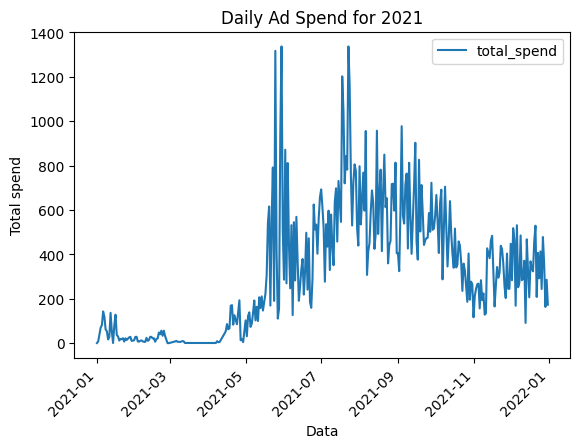

In [7]:
# Chart of daily advertising expenses in 2021

facebook_groupday=facebook.groupby(facebook['ad_date'].dt.date)[['total_spend','total_value']].sum().reset_index()
facebook_groupday['ad_date']=pd.to_datetime(facebook_groupday['ad_date'], format='mixed') 
facebook_2021= facebook_groupday[facebook_groupday['ad_date'].dt.year == 2021] 

facebook_2021.plot(x='ad_date', y='total_spend', kind = 'line')
plt.title("Daily Ad Spend for 2021")
plt.xlabel("Data")
plt.ylabel("Total spend")
plt.xticks(rotation=45)
plt.show()

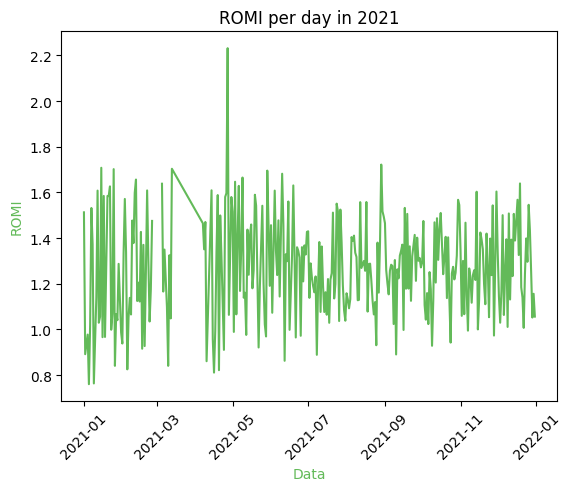

In [11]:
# 2. Daily ROMI for 2021

facebook_groupday['ROMI_day']=facebook_groupday.total_value/facebook_groupday.total_spend

facebook_groupday['ROMI_day_ma']=facebook_groupday.ROMI_day.rolling(window=7, min_periods=1).mean()
facebook_groupday['total_spend_ma']=facebook_groupday.total_spend.rolling(window=7, min_periods=1).mean()

facebook_2021= facebook_groupday[facebook_groupday['ad_date'].dt.year == 2021]

plt.plot('ad_date', 'ROMI_day', data=facebook_2021, color='#63ba59')
plt.title("ROMI per day in 2021")
plt.xlabel("Data", color='#63ba59')
plt.ylabel("ROMI", color='#63ba59')
plt.xticks(rotation=45)
plt.show()


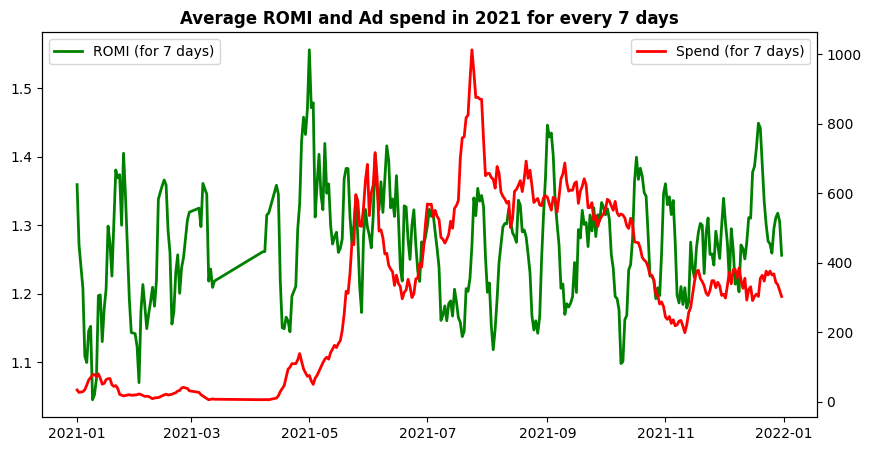

In [12]:
# Created a chart with a moving average for ROMI and expenses

fig, ax = plt.subplots(figsize=(10,5))
ax.plot('ad_date', 'ROMI_day_ma', data=facebook_2021, color="green", label="ROMI (for 7 days)", linewidth=2)
ax2 = ax.twinx() 
ax2.plot('ad_date', 'total_spend_ma', data=facebook_2021, color="red", label="Spend (for 7 days)", linewidth=2)

ax.legend(loc="upper left")
ax2.legend(loc="upper right")
ax.set_title('Average ROMI and Ad spend in 2021 for every 7 days', fontsize=12, fontweight='bold')
plt.show()

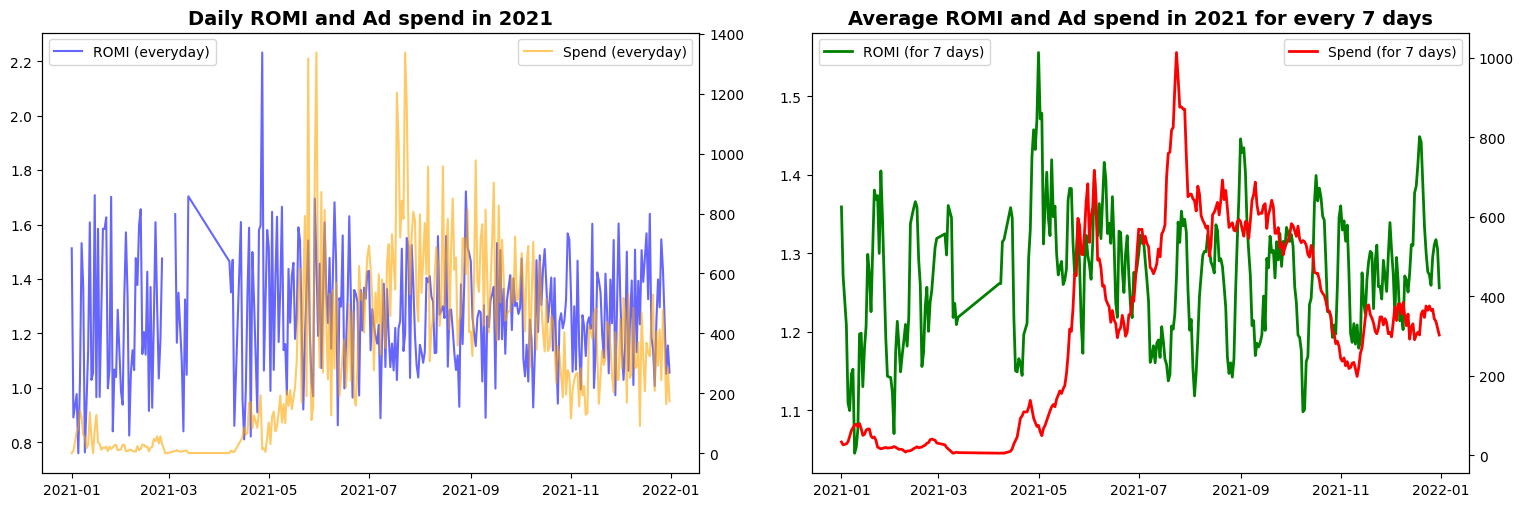

In [13]:
# Created a chart displaying daily values alongside a moving average
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
fig.tight_layout(w_pad=5)

ax1 = ax[0]
ax2 = ax1.twinx()
ax1.plot('ad_date', 'ROMI_day', data=facebook_2021, color="blue", label="ROMI (everyday)", alpha=0.6)
ax2.plot('ad_date', 'total_spend', data=facebook_2021, color="orange", label="Spend (everyday)", alpha=0.6)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
ax[0].set_title('Daily ROMI and Ad spend in 2021', fontsize=14, fontweight='bold')

ax3 = ax[1]
ax4 = ax3.twinx()
ax3.plot('ad_date', 'ROMI_day_ma', data=facebook_2021, color="green", label="ROMI (for 7 days)", linewidth=2)
ax4.plot('ad_date', 'total_spend_ma', data=facebook_2021, color="red", label="Spend (for 7 days)", linewidth=2)
ax3.legend(loc="upper left")
ax4.legend(loc="upper right")
ax[1].set_title('Average ROMI and Ad spend in 2021 for every 7 days', fontsize=14, fontweight='bold')

plt.show()

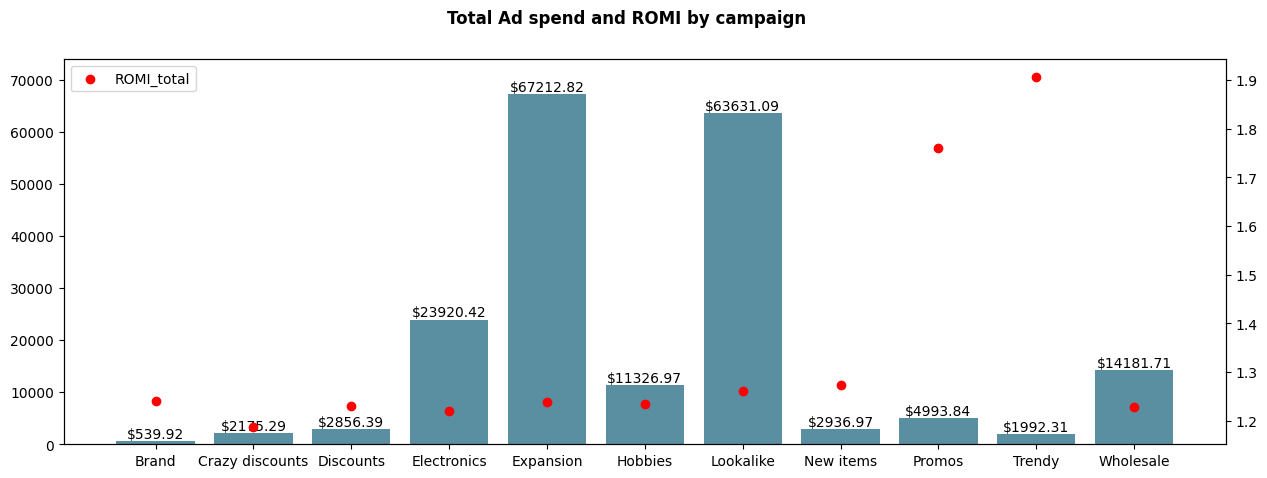

In [14]:
# 3. Built a chart grouping data by company to visualize total advertising expenses and ROMI

facebook_campaign=facebook.groupby(facebook.campaign_name)[['total_spend','total_value']].sum().reset_index()
facebook_campaign ['ROMI_total']=facebook_campaign.total_value/facebook_campaign.total_spend

fig, ax = plt.subplots(figsize=(15,5))
ax1=ax.twinx()
ax.bar('campaign_name', 'total_spend', data=facebook_campaign, color='#5a8ea1')
ax1.scatter('campaign_name', 'ROMI_total', data=facebook_campaign, color='red')
ax1.legend(loc='upper left')
fig.suptitle('Total Ad spend and ROMI by campaign', fontsize=12, fontweight='bold')

ax.set_ylim(0, facebook_campaign['total_spend'].max()*1.1)
facebook_campaign=facebook_campaign.set_index('campaign_name')
for b in facebook_campaign.index:
    ax.text(b,
               facebook_campaign.loc[b, 'total_spend'],
                '$'+str(facebook_campaign.loc[b,'total_spend']),
                ha= 'center',
                va= 'bottom')
plt.show()


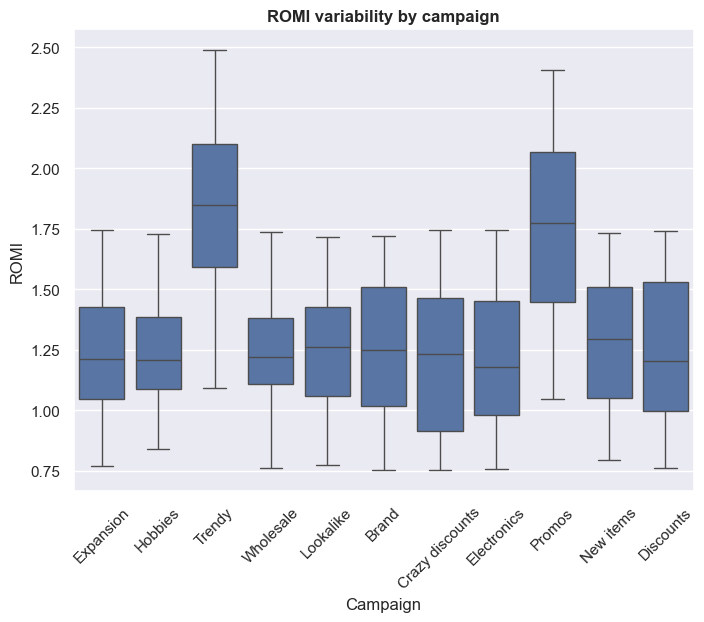

In [15]:
# 4. Built a boxplot to visualize the distribution of ROMI across companies
sns.set()
plt.figure(figsize=(8,6))
sns.boxplot(data=facebook, x='campaign_name', y='romi')
plt.title('ROMI variability by campaign', fontsize=12, fontweight='bold')
plt.xlabel("Campaign")
plt.ylabel("ROMI")
plt.xticks(rotation=45)
plt.show()

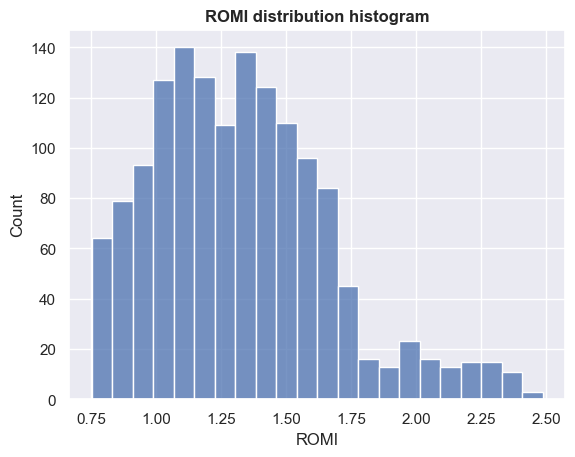

Most companies are profitable.


In [18]:
# 5. Created a histogram showing the distribution of ROMI
sns.histplot(facebook, x='romi')
plt.title('ROMI distribution histogram', fontsize=12, fontweight='bold')
plt.xlabel("ROMI")
plt.show()
print('Most companies are profitable.')

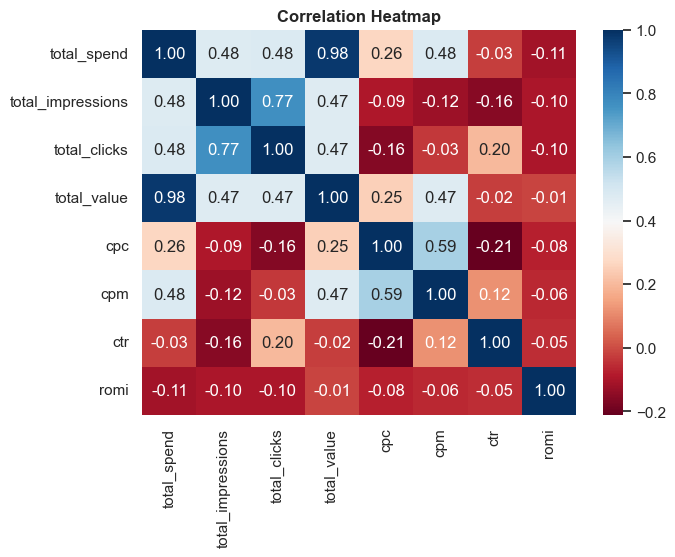

Metrics with the highest correlation 0.98 total_spend and total_value
Metrics with the lowest correlation abs(-0,01) romi and total_value
total_value correlates with the number of views, clicks, and the cost of banner impressions. Correlation with other metrics is relatively low.


In [17]:
# 6. Created a correlation heatmap
facebook_corr=facebook.select_dtypes(include='number').corr()
plt.figure(figsize=(7,5))
sns.heatmap(facebook_corr, annot=True, cmap='RdBu', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=12, fontweight='bold') 
plt.show()
print('Metrics with the highest correlation 0.98 total_spend and total_value')
print('Metrics with the lowest correlation abs(-0,01) romi and total_value')
print('total_value correlates with the number of views, clicks, and the cost of banner impressions. Correlation with other metrics is relatively low.')

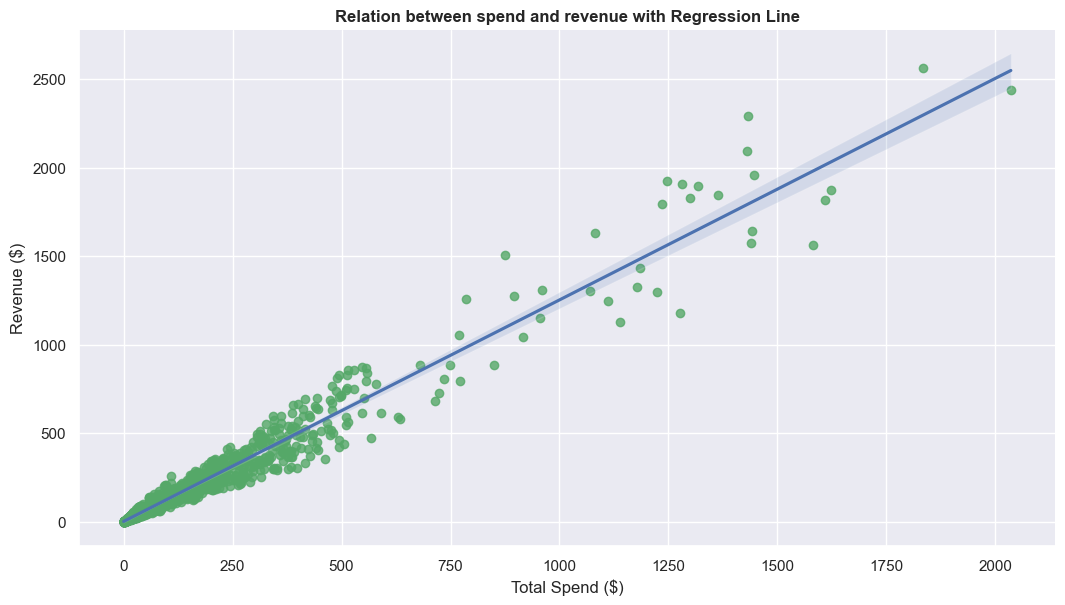

In [30]:
# 7. Built a scatter plot including a regression line to analyze relationships between variables
sns.lmplot(facebook, x='total_spend', y='total_value', scatter_kws={'color' : 'g'}, height=6, aspect=1.8)
plt.title('Relation between spend and revenue with Regression Line', fontsize=12, fontweight='bold') 
plt.xlabel("Total Spend ($)")
plt.ylabel("Revenue ($)")
plt.show()